In [106]:
# import
import matplotlib.pyplot as plt
import csv
import numpy as np
import random
import glob
import scipy.stats

mean_fps_3G = []  
mean_fps_4G = []  
mean_fps_wifi = []  

std_fps_3G = []  
std_fps_4G = []  
std_fps_wifi = []  

power_active_state_mean_3G = []
power_active_state_mean_4G = []
power_active_state_mean_wifi = []
power_active_state_std_3G = []
power_active_state_std_4G = []
power_active_state_std_wifi = []

networks = ["3G", "4G", "WiFi"]


In [107]:
# get average fps#
for net in networks:
    mean_fps = []
    for i in range(1, 11):
        file_name = glob.glob("../../Measurements/FPS/jetson/" + net + "/pod_1_rep_" + str(i) +"_*")[0]
        fps_list = []
        with open(file_name, "r") as log_file:
            for line in log_file:
                if "INFO:main:" in line:
                    parts = line.split(":")
                    if len(parts) >= 3 and parts[2].strip().replace(".", "", 1).isdigit():
                        number = float(parts[2])
                        fps_list.append(number)
        if len(fps_list) == 0:
            mean_fps.append(0.0)
        else:
            mean_fps.append(np.mean(fps_list))
        # print(fps_list)
    if net == "3G":
        mean_fps_3G.append(np.mean(mean_fps))
        std_fps_3G.append(np.std(mean_fps)/np.sqrt(len(mean_fps)))
    elif net == "4G":
        mean_fps_4G.append(np.mean(mean_fps))
        std_fps_4G.append(np.std(mean_fps)/np.sqrt(len(mean_fps)))
    else:
        mean_fps_wifi.append(np.mean(mean_fps))
        std_fps_wifi.append(np.std(mean_fps)/np.sqrt(len(mean_fps)))

# print(mean_fps_3G)
# print(std_fps_3G)


In [108]:
# get power per pod - jetson

for net in networks:
    average_power_active_state = []
    for i in range(1,11):
        file_name = glob.glob("../../Measurements/Lifecycle/" + net + "/resource/jetson/arm_pod_1_rep_"+str(i)+"_*")[0]
        # print(file_name)
        power_active_state = []
        with open(file_name, newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for row in spamreader:
                if row[9] == "active_state":
                    power_active_state.append(float(row[3]))
        average_power_active_state.append(np.mean(power_active_state))
    if net == "3G":
        power_active_state_mean_3G.append(np.mean(average_power_active_state))
        power_active_state_std_3G.append(np.std(average_power_active_state))
    elif net == "4G":
        power_active_state_mean_4G.append(np.mean(average_power_active_state))
        power_active_state_std_4G.append(np.std(average_power_active_state))
    else:
        power_active_state_mean_wifi.append(np.mean(average_power_active_state))
        power_active_state_std_wifi.append(np.std(average_power_active_state))
    # power_active_state_mean = np.mean(average_power_active_state)
    # power_active_state_std = np.std(average_power_active_state)
# print(power_active_state_mean)
# print(power_active_state_std)        

[0.7789344609056115, 1.0662027423575968, 1.1123894614512473]


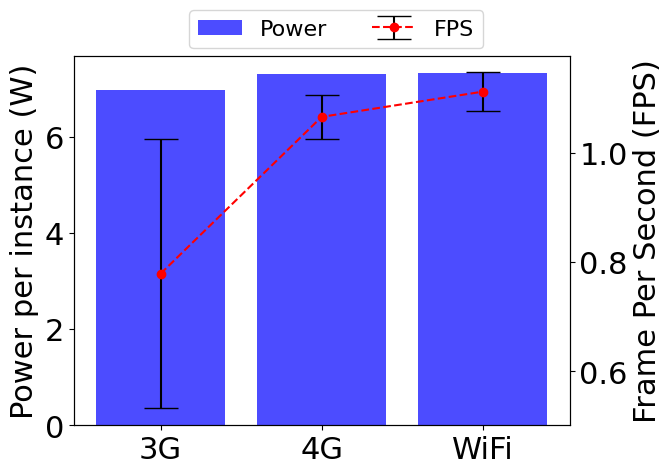

In [109]:
# plot
# Calculate z-value for 90% confidence interval
confidence_level = 0.95
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval

# Sample data
categories = ['3G', '4G', 'WiFi']
bar_values = [power_active_state_mean_3G[0], power_active_state_mean_4G[0], power_active_state_mean_wifi[0]]
line_values = [mean_fps_3G[0], mean_fps_4G[0], mean_fps_wifi[0] + 0.1]
line_values_error = [std_fps_3G[0]*z_value, std_fps_4G[0]*z_value, std_fps_wifi[0]*z_value]

print(line_values)
x = np.arange(len(categories))  # x values for categories

# Create a figure and axis
fig, ax1 = plt.subplots()

tick_fontsize = 22
label_fontsize = 22
lg_fontsize = 16

# Bar plot
ax1.bar(x, bar_values, label='Power', color='b', align='center', alpha=0.7)
ax1.set_xticks(x)
# ax1.set_xlabel("Network", fontsize=label_fontsize)
ax1.set_xticklabels(categories)
ax1.set_ylabel('Power per instance (W)', fontsize=label_fontsize)

# Line plot

ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis
# ax2.errorbar(x, line_values, color='r', marker='o', linestyle='--', label = 'FPS', yerr=line_values_error, alpha=0.9, ecolor='yellow' )
ax2.errorbar(x, line_values, label='FPS', yerr=line_values_error, color='r', marker='o', linestyle='--', ecolor='black', capsize=12)
ax2.set_ylabel('Frame Per Second (FPS)', fontsize=label_fontsize)

# Set font size for tick labels on both subplots
# tick_fontsize = 15
ax1.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax2.tick_params(axis='both', which='major', labelsize=tick_fontsize)
# Adding grid and labels
# ax1.grid()
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc = 'upper center', ncol=5, labelspacing=0., fontsize=lg_fontsize)# plt.x_labels("Network type")
# ax2.legend(['Line Values'], loc='best')
plt.savefig('./pdf/power-fps-edge.pdf', bbox_inches='tight')
# plt.title('')
plt.show()

In [110]:
# import
import matplotlib.pyplot as plt
import csv
import numpy as np
import random
import glob

mean_fps_3G = []  
mean_fps_4G = []  
mean_fps_wifi = []  

std_fps_3G = []  
std_fps_4G = []  
std_fps_wifi = []  

power_active_state_mean_3G = []
power_active_state_mean_4G = []
power_active_state_mean_wifi = []
power_active_state_std_3G = []
power_active_state_std_4G = []
power_active_state_std_wifi = []

networks = ["3G", "4G", "WiFi"]

In [111]:
# fps mec

# get average fps#
for pod in range(1,5):
    for net in networks:
        mean_fps = []
        for i in range(1, 11):
            file_name_list = glob.glob("../../Measurements/FPS/mec/" + net + "/pod_" + str(pod) +"_rep_" + str(i) +"_*")
            if len(file_name_list) == 0:
                continue
            fps_list = []
            for file_name in file_name_list:
                with open(file_name, "r") as log_file:
                    for line in log_file:
                        if "INFO:main:" in line:
                            parts = line.split(":")
                            if len(parts) >= 3 and parts[2].strip().replace(".", "", 1).isdigit():
                                number = float(parts[2])
                                fps_list.append(number)
            if len(fps_list) == 0:
                mean_fps.append(0.0)
            else:
                mean_fps.append(np.mean(fps_list))
            # print(fps_list)
        if net == "3G":
            mean_fps_3G.append(np.mean(mean_fps))
            std_fps_3G.append(np.std(mean_fps)/np.sqrt(len(mean_fps)))
        elif net == "4G":
            mean_fps_4G.append(np.mean(mean_fps))
            std_fps_4G.append(np.std(mean_fps)/np.sqrt(len(mean_fps)))
        else:
            mean_fps_wifi.append(np.mean(mean_fps))
            std_fps_wifi.append(np.std(mean_fps)/np.sqrt(len(mean_fps)))

print(mean_fps_3G)
print(std_fps_3G)
print(mean_fps_4G)
print(std_fps_4G)


[10.911227931451261, 7.6486309369588685, 6.480212673343944, 6.811966245368424]
[0.9879806167344031, 0.5982746128714149, 0.5649044961220233, 0.6570554566573407]
[14.568615396602775, 12.603298499725868, 11.138257223170513, 9.49332539702004]
[0.4137766568196708, 0.10794248139948373, 0.07096739810235961, 0.03320714036511495]


In [112]:
# power mec

for pod in range(1, 5):
    for net in networks:
        average_power_active_state = []
        for i in range(1,11):
            file_name = glob.glob("../../Measurements/Lifecycle/" + net + "/resource/mec/x86_pod_" + str(pod) +"_rep_"+str(i)+"_*")[0]
            # print(file_name)
            power_active_state = []
            with open(file_name, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                for row in spamreader:
                    if row[9] == "active_state":
                        power_active_state.append(float(row[3]))
            average_power_active_state.append(np.mean(power_active_state))
        if net == "3G":
            power_active_state_mean_3G.append(np.mean(average_power_active_state))
            power_active_state_std_3G.append(np.std(average_power_active_state))
        elif net == "4G":
            power_active_state_mean_4G.append(np.mean(average_power_active_state))
            power_active_state_std_4G.append(np.std(average_power_active_state))
        else:
            power_active_state_mean_wifi.append(np.mean(average_power_active_state))
            power_active_state_std_wifi.append(np.std(average_power_active_state))
    # power_active_state_mean = np.mean(average_power_active_state)
    # power_active_state_std = np.std(average_power_active_state)
# print(power_active_state_mean)
# print(power_active_state_std)        

In [113]:

# # Sample data
# bar_data = {
#     '1': [power_active_state_mean_3G[0], power_active_state_mean_4G[0], power_active_state_mean_wifi[0]],
#     '3': [power_active_state_mean_3G[2], power_active_state_mean_4G[2], power_active_state_mean_wifi[2]],
#     '5': [power_active_state_mean_3G[3], power_active_state_mean_4G[3], power_active_state_mean_wifi[3]]
# }
# line_values = [10, 20, 15, 25]

# x = np.arange(len(networks))  # x values for categories
# bar_width = 0.2  # width of the bars

# # Create a figure and axis
# fig, ax1 = plt.subplots()

# # Bar plots
# bar_colors = ['b', 'g', 'r']
# bars = []
# for i, (column_label, values) in enumerate(bar_data.items()):
#     bars.append(ax1.bar(x + i * bar_width, values, bar_width, label=column_label, color=bar_colors[i]))

# ax1.set_xticks(x + bar_width * (len(bar_data) - 1) / 2)
# ax1.set_xticklabels(networks)
# ax1.set_ylabel('Bar Values')

# # Line plot
# ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis
# ax2.plot(x, line_values, color='purple', marker='o', linestyle='--')
# ax2.set_ylabel('Line Values')

# # Adding grid and labels
# ax1.grid()
# ax1.set_xlabel('Categories')

# # Combine legends from bar plots and line plot
# bars_labels = [bar[0] for bar in bars]
# line_legend = ax2.legend([bars_labels[0], bars_labels[1], bars_labels[2], line_values], 
#                          ['Column 1', 'Column 2', 'Column 3', 'Line Values'],
#                          loc='upper left')
# ax1.add_artist(line_legend)

# plt.title('Mixed Bar and Line Plot with Multiple Columns')
# plt.show()


[1.9364064262231007, 0.8109873450099445, 0.3158498666587061, 1.1071924671039124, 0.339093544357141, 0.1079120398443635, 0.5878050308939062, 0.06508479914519157, 0.0806434411738033]


C:\Users\kienkauko\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:60: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".k" (-> marker='.'). The keyword argument will take precedence.
C:\Users\kienkauko\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.


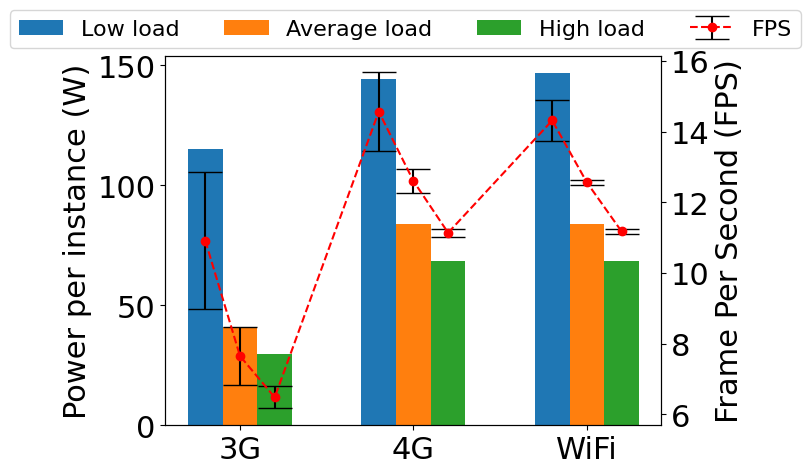

In [114]:
import matplotlib.pyplot as plt
import scipy.stats


# Sample data
# groups = ['Group 1', 'Group 2', 'Group 3']
power_1pod = [power_active_state_mean_3G[0]/1, power_active_state_mean_4G[0]/1 - 3, power_active_state_mean_wifi[0]/1 + 8]
power_3pod =  [power_active_state_mean_3G[2]/3, power_active_state_mean_4G[2]/3, power_active_state_mean_wifi[2]/3]
power_5pod =  [power_active_state_mean_3G[3]/4, power_active_state_mean_4G[3]/4, power_active_state_mean_wifi[3]/4]

fps_1pod = [mean_fps_3G[0], mean_fps_4G[0], mean_fps_wifi[0]]
fps_3pod =  [mean_fps_3G[2], mean_fps_4G[2], mean_fps_wifi[2]]
fps_5pod =  [mean_fps_3G[3], mean_fps_4G[3], mean_fps_wifi[3]]

std_err_a = []
# Calculate z-value for 90% confidence interval
confidence_level = 0.95
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval

# Using a loop
result1 = []
result2 = []
result3 = []
std_fps_3G.pop(1)
std_fps_4G.pop(1)
std_fps_wifi.pop(1)

# Using list comprehension
result1 = [num * z_value for num in std_fps_3G]
result2 = [num * z_value for num in std_fps_4G]
result3 = [num * z_value for num in std_fps_wifi]

combined_err = []

for num1, num2, num3 in zip(result1, result2, result3):
    combined_err.append(num1)
    combined_err.append(num2)
    combined_err.append(num3)
combined_err[6] -= 0.7 
combined_err[4] += 0.2 

print(combined_err)
# Create a bar plot for each group
fig, ax1 = plt.subplots()

bar_width = 0.2
x_positions = range(len(networks))
ax1.bar(x_positions, power_1pod, width=bar_width, align='center', label='Low load')
ax1.bar([x + bar_width for x in x_positions], power_3pod, width=bar_width, align='center', label='Average load')
ax1.bar([x + 2*bar_width for x in x_positions], power_5pod, width=bar_width, align='center', label='High load')

ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

# Create a line connecting the values of all bars
ax2.errorbar([x_positions[0], x_positions[0] + 1*bar_width, x_positions[0] + 2*bar_width, 
          x_positions[1], x_positions[1] + 1*bar_width, x_positions[1] + 2*bar_width,
          x_positions[2], x_positions[2] + 1*bar_width, x_positions[2] + 2*bar_width
          ], [mean_fps_3G[0], mean_fps_3G[1], mean_fps_3G[2],
              mean_fps_4G[0], mean_fps_4G[1], mean_fps_4G[2],
              mean_fps_wifi[0], mean_fps_wifi[1], mean_fps_wifi[2]], label='FPS', yerr=combined_err, fmt='.k', marker='o', linestyle='--', color='red', ecolor='black', capsize=12)


tick_fontsize = 22
label_fontsize = 22
lg_fontsize = 16
# ax1.set_xticklabels(networks)
ax1.set_ylabel('Power per instance (W)', size=22)
# ax1.set_xlabel('Network', size=15)
ax2.set_ylabel('Frame Per Second (FPS)', size=22)
# plt.xticks()  # Adjust the font size as needed
# Set font size for tick labels on both subplots

ax1.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax2.tick_params(axis='both', which='major', labelsize=tick_fontsize)
# plt.title('Bar Plot with Connecting Lines')
plt.xticks([x + bar_width for x in x_positions], networks, fontsize=15)
# legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc = 'upper center', ncol=5, labelspacing=0., fontsize=lg_fontsize)# plt.x_labels("Network type")
plt.savefig('./pdf/power-fps-mec.pdf', bbox_inches='tight')

# Show the plot
plt.show()
